## Simple/Univariate Linear Regression

### Importing necessary libraries and dataset

In [1]:
# Importing required libraries.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from scipy.special import boxcox1p
from scipy.stats import boxcox

In [4]:
# Reading in the csv file.
df = pd.read_csv(r'C:\Users\Shivu\Downloads\Cardetails\data.csv')

### A glimpse of the dataset

In [5]:
# Displying the first five rows.
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
# Displaying the shape of the dataframe.
df.shape

(11914, 16)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,11914.0,2010.384338,7.579740,1990.0,2007.0,2015.0,2016.00,2017.0
Engine HP,11845.0,249.386070,109.191870,55.0,170.0,227.0,300.00,1001.0
Engine Cylinders,11884.0,5.628829,1.780559,0.0,4.0,6.0,6.00,16.0
Number of Doors,11908.0,3.436093,0.881315,2.0,2.0,4.0,4.00,4.0
highway MPG,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.00,354.0
city mpg,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.00,137.0
Popularity,11914.0,1554.911197,1441.855347,2.0,549.0,1385.0,2009.00,5657.0
MSRP,11914.0,40594.737032,60109.103604,2000.0,21000.0,29995.0,42231.25,2065902.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

## Checking missing values

In [9]:
print(round(100*(df.isnull().sum()/df.shape[0]),2))

Make                  0.00
Model                 0.00
Year                  0.00
Engine Fuel Type      0.03
Engine HP             0.58
Engine Cylinders      0.25
Transmission Type     0.00
Driven_Wheels         0.00
Number of Doors       0.05
Market Category      31.41
Vehicle Size          0.00
Vehicle Style         0.00
highway MPG           0.00
city mpg              0.00
Popularity            0.00
MSRP                  0.00
dtype: float64


### Obseravations

1. There are total 15 features and most of the columns have all the data except for one column.
2. About half of the features are object type.

__According to the assumptions of linear model, to create a linear model, the feature variables should be normally distribued. First checking for the target variable MSRP.__

In [10]:
def plot_to_check_normal_dist(df, feature):
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as grd
    import seaborn as sns
    from scipy import stats
    import matplotlib.style as style
    style.use('dark_background')
    
    fig = plt.figure(figsize = (12,8))
    grid = grd.GridSpec(ncols = 3, nrows = 3, figure = fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df[feature], ax = ax1)
    
    ax2 = fig.add_subplot(grid[2, :2])
    ax2.set_title('Q-Q Plot')
    stats.probplot(df[feature], plot = ax2)
    
    ax3 = fig.add_subplot(grid[:,2])
    ax3.set_title('Box Plot')
    sns.boxplot(df[feature], orient = 'v', ax = ax3)
    
    plt.show()

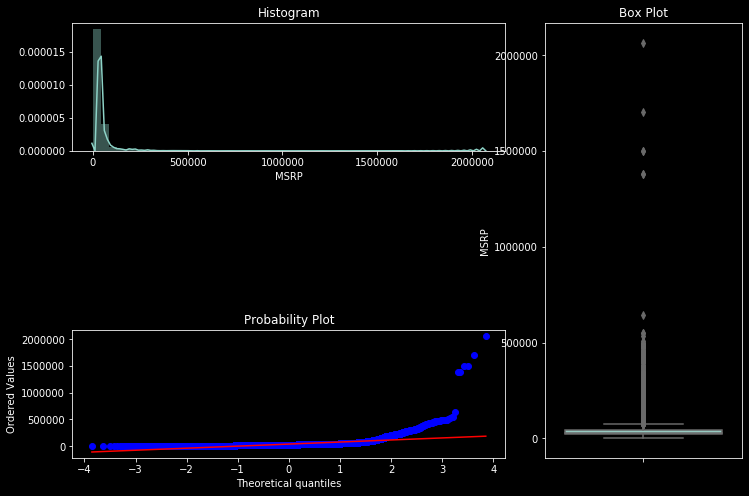

In [11]:
plot_to_check_normal_dist(df, "MSRP")

In [12]:
print('Skewness : '+str(df['MSRP'].skew()))
print('Kurtosis : '+str(df['MSRP'].kurt()))

Skewness : 11.771987129334972
Kurtosis : 268.92627647631605


### Observations

__1. From the above 3 plots we can infer that,__<br>
        __i. Target Variable is not normally distributed__<br>
        __ii. It is right skewed__<br>
        __iii. It has multiple outliers.__<br>
__2. It has a positive skewness value indicating that the variable is right skewed or the tail on the right hand side of the distribution is longer or fatter.__<br>
__3. Positive skewness means mean and median will be greater than mode indicating that more cars were sold by less than average price or there are few cars which have been sold to very high price which can be inferred by the very high value of the kurtosis.__

#### Correlation between target variable and all the feature variables.

In [13]:
(df.corr()**2)['MSRP'].sort_values(ascending = False)[1:]

Engine HP           0.438254
Engine Cylinders    0.282293
Year                0.051797
highway MPG         0.025614
city mpg            0.024862
Number of Doors     0.016036
Popularity          0.002350
Name: MSRP, dtype: float64

Starting with most correlated variable i.e Engine HP for Univariate Linear Regression

## MSRP vs Engine HP

In [14]:
# Plotting a scatter plot of Engine HP vs Price for checking linearity assumption of linear regression.
def plot_scatterplot(x,y):
    plt.figure(figsize = [6,6])
    style.use('dark_background')
    sns.scatterplot(x = x, y = y)
    plt.show()

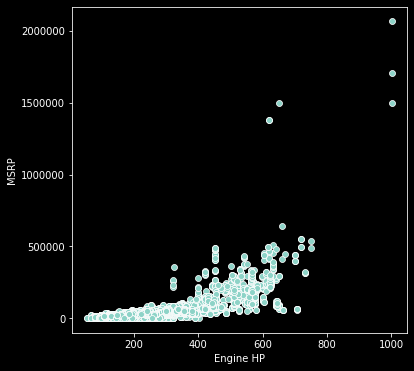

In [15]:
plot_scatterplot(df['Engine HP'], df['MSRP'])

### Observation

__There are a few outliers in the scatterplot and also the scatterplot seems to follow a trend that is "As the Engine HP increases the MSRP increases".__

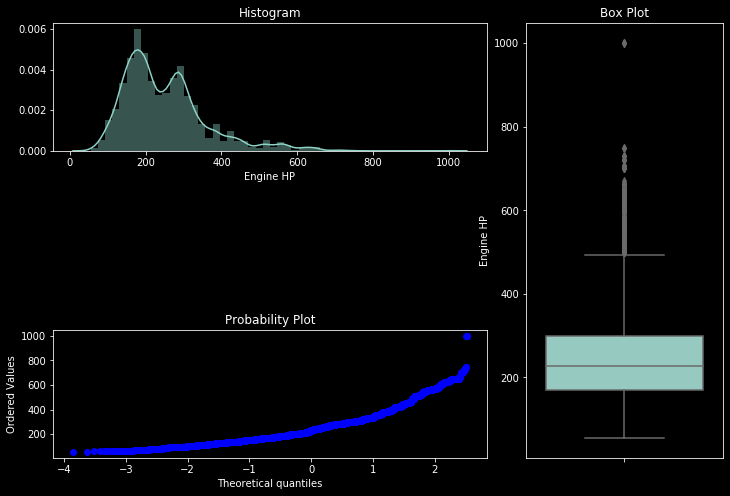

In [16]:
plot_to_check_normal_dist(df,'Engine HP')

In [17]:
print(df['Engine HP'].skew())
print(df['Engine HP'].kurt())

1.291229813313272
2.3238844260297853


### Checking the assumptions of linear regression

### 1. Linearity Assumption & Homoscedasticity

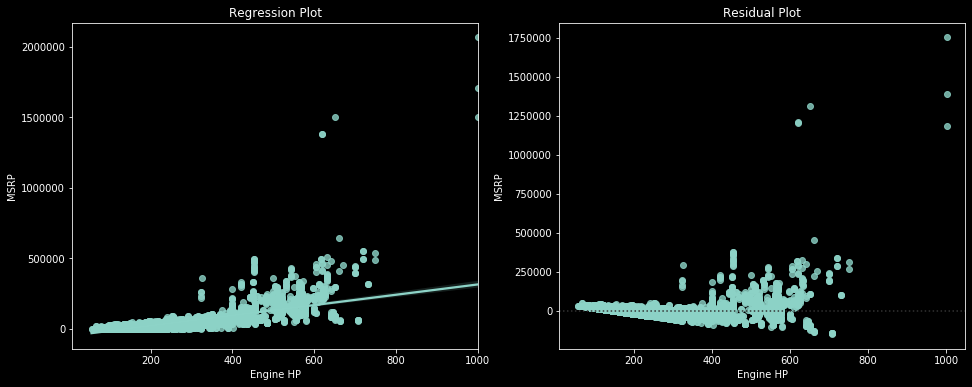

In [18]:
fig, (ax1, ax2) = plt.subplots(figsize = (16,6), ncols = 2, sharey = False)
style.use('dark_background')
sns.regplot(x = df['Engine HP'], y = df['MSRP'], ax=ax1)
ax1.set_title('Regression Plot')
sns.residplot(x = df['Engine HP'], y = df['MSRP'], ax = ax2)
ax2.set_title('Residual Plot')
plt.show()

### Observations

__Ideally, if the assumptions are met, the residuals will be scattered around the centre line with a constant variance in a random pattern. Even though in the above residual plot it seems like there is enough linear relationship between the target and feature variable, as the Engine HP increases the variance also increases(heteroscedastic).__

In [56]:
# Before transfomring data, Create X(independent) & y(dependent) variables and splitting them into train and test datasets
# Engine Horse Power is an important factor for price.
X = pd.DataFrame(df['Engine HP'])
y = pd.DataFrame(df['MSRP'])

In [57]:
# Splitting the datasets into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

### Missing Value Treatment

In [58]:
# Since linear regression cannot handle missing values it has to be treated before creating regression model.
missing_index_train = X_train[X_train['Engine HP'].isnull() == True].index

In [59]:
# Dropping missing values from X
X_train.drop(missing_index_train, axis = 0, inplace = True)

# Dropping the prices corresponding to missing values using index
y_train.drop(missing_index_train, axis = 0, inplace = True)

In [60]:
missing_index_test = X_test[X_test['Engine HP'].isnull()==True].index
X_test.drop(missing_index_test,axis = 0, inplace=True)

y_test.drop(missing_index_test,axis=0,inplace=True)

### Outlier Treatment

In [61]:
# Creating Inter Quantile Rangr for treating the outliers 
Q1 = X_train['Engine HP'].quantile(0.25)
Q3 = X_train['Engine HP'].quantile(0.75)
IQR = Q1 - Q3

In [62]:
outlier_index_train = X_train[((X_train > (Q1 - 1.5*IQR)) | (X_train < (Q3 + 1.5*IQR))).any(axis = 1)].index

In [63]:
# Dropping the values which are not in the range of IQR.
X_train.drop(outlier_index_train, axis =0, inplace =True)

In [64]:
# Dropping the corresponding values of y 
y_train.drop(outlier_index_train, axis = 0, inplace = True)

In [65]:
Q1_test = X_test['Engine HP'].quantile(0.25)
Q3_test = X_test['Engine HP'].quantile(0.75)
IQR_test = Q1_test - Q3_test

In [66]:
outlier_index_test = X_test[((X_test > (Q1_test -1.5*IQR_test)) | (X_test < (Q3_test + 1.5*IQR_test))).any(axis=1)].index

In [67]:
X_test.drop(outlier_index_test,axis =0, inplace=True)
y_test.drop(outlier_index_test, axis=0, inplace=True)

In [68]:
# Scaling the X values.
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [69]:
X_test = scaler.transform(X_test)

In [70]:
# Fitting the model
linear_model = LinearRegression().fit(X_train, y_train)

In [71]:
# R-squared value of the model after treating outliers for train set
linear_model.score(X_train, y_train)

0.44853257228846566

In [72]:
# Predicting the target values for test set
y_pred = linear_model.predict(X_test)

In [73]:
# R-squared value of the model after treating outliers for test set
linear_model.score(X_test, y_test)

0.43493682076371154

In [74]:
# Displaying the coefficient of Engine HP
linear_model.coef_

array([[43654.04683582]])

In [75]:
# Displaying the intercept of the best fit line
linear_model.intercept_

array([8973.35976887])

In [76]:
# Creating a avariable which stores the residuals
residuals = y_test - y_pred

In [77]:
# Displaying MSE, RMSE, MAE of the model
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)
print("MSE:",format(MSE),"\nRMSE:",format(RMSE),"\nMAE:",format(MAE))

MSE: 161563378.08064902 
RMSE: 12710.75835977732 
MAE: 8501.801544491509


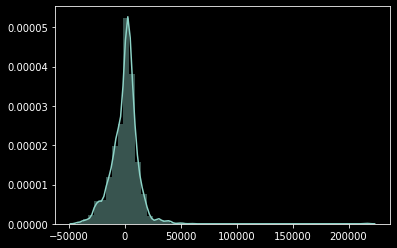

In [78]:
# Checking the normality assumption of residuals
sns.distplot(residuals)

Text(0, 0.5, 'Residuals')

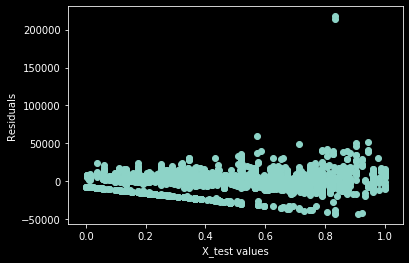

In [79]:
# Plotting scatter plot of X values against the residuals for checking the correlation. 
plt.scatter(x= X_test, y = residuals)
plt.xlabel('X_test values')
plt.ylabel('Residuals')

From the plot we can see that there is an increase in variance as the independent variable value increases that is heteroscedastic

### Interpretations from the above model:

1. R-squared value of the model is 0.45 on training and 0.43 on test set which is low indicating that the model explains about 43% of variance in the data, and the model is neither overfitted nor underfitted.
2. Equation of the best fit line is
y = 8973.36 + 43654.04 * X
3. The model has high bias and low variance since only one valriable with coefficient of linear degree is used. 